In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cd drive/My Drive/algorithmtrading/pair_trading/Datas

/content/drive/My Drive/algorithmtrading/pair_trading/Datas


In [ ]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin:end]

# - 과거 1분단위 데이터 받아오기

In [ ]:
now = '20210205'

kodex200 = pd.read_pickle('KODEX 200TR(m)_'+now)
tiger_top10 = pd.read_pickle('TIGER TOP10(m)_'+now)

temp =  pd.merge(left = kodex200 , right = tiger_top10, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')
temp.columns = ['kodex200','volume','tiger_top10','volume']
temp = temp[['kodex200','tiger_top10']]

temp['kodex200']=abs(pd.to_numeric(temp['kodex200']))
temp['tiger_top10']=abs(pd.to_numeric(temp['tiger_top10']))
temp['tiger_top10'] = temp['tiger_top10']
temp['spread'] = temp['tiger_top10'] - temp['kodex200']
# temp['ma60_spread'] = temp['spread'].rolling(window=60, center=False).mean()

temp

,kodex200,tiger_top10,spread
체결시간,,,
20200203090000,8950,8971,21
20200203090100,8940,8927,-13
20200203090500,8970,8941,-29
20200203090600,8970,8966,-4
20200203091000,8955,8966,11
...,...,...,...
20210205130700,13705,15235,1530
20210205130800,13720,15245,1525
20210205130900,13725,15250,1525


In [ ]:
print(coint(temp['kodex200'],temp['tiger_top10']))

(-3.09552735972528, 0.08920466438893204, array([-3.89665723, -3.33625119, -3.04453412]))


# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [ ]:
df = {}
calender = []
for date in range(20210101,20210205):
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        # ratio  = int((temps['kodex200'] / temps['tiger_top10']).mean)
        temps['ma60_mean'] = temps['spread'].rolling(window=5, center=False).mean()
        temps['ma60_std'] = temps['spread'].rolling(window=5, center=False).std()
        temps['ma60_zscore'] = (temps['spread'] - temps['ma60_mean']) / temps['ma60_std']
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))
    except:
        pass
calender

# 그래프 그리기

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

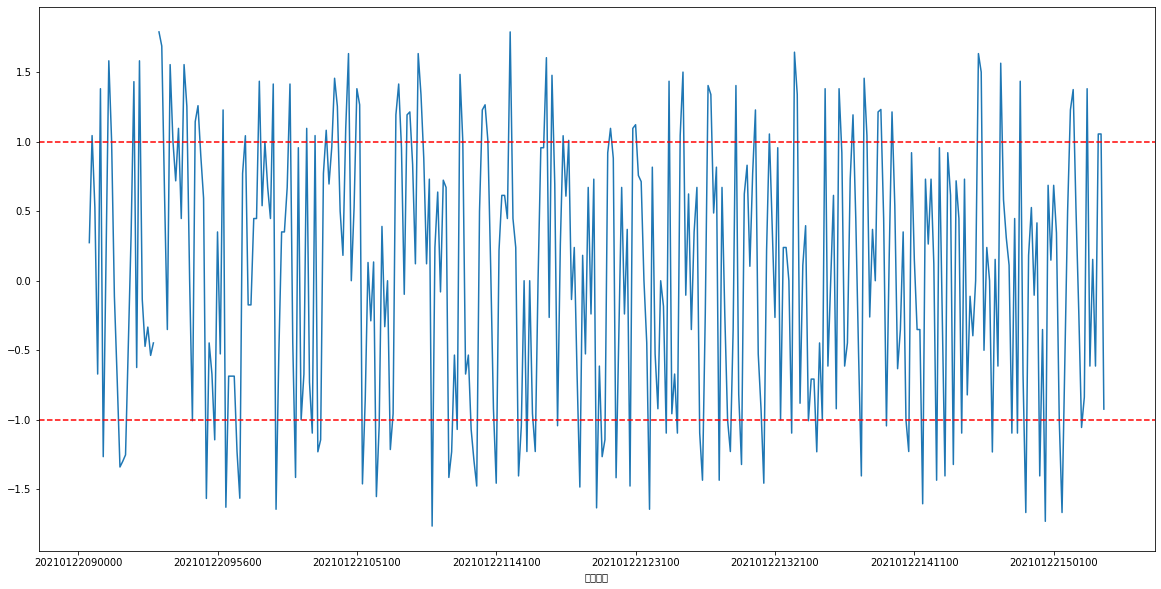

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

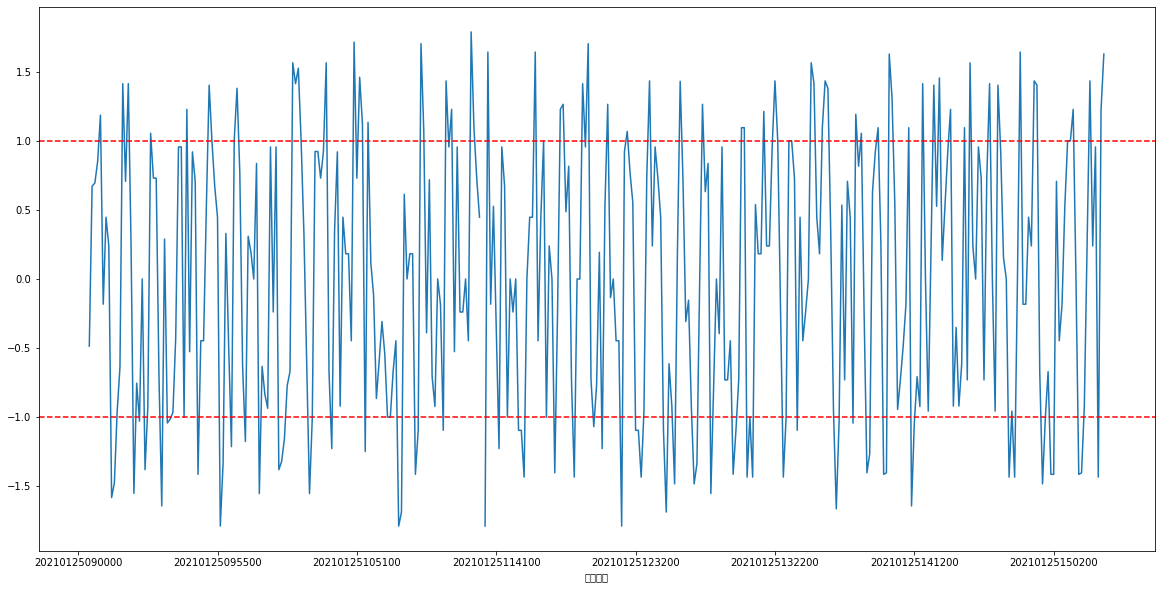

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

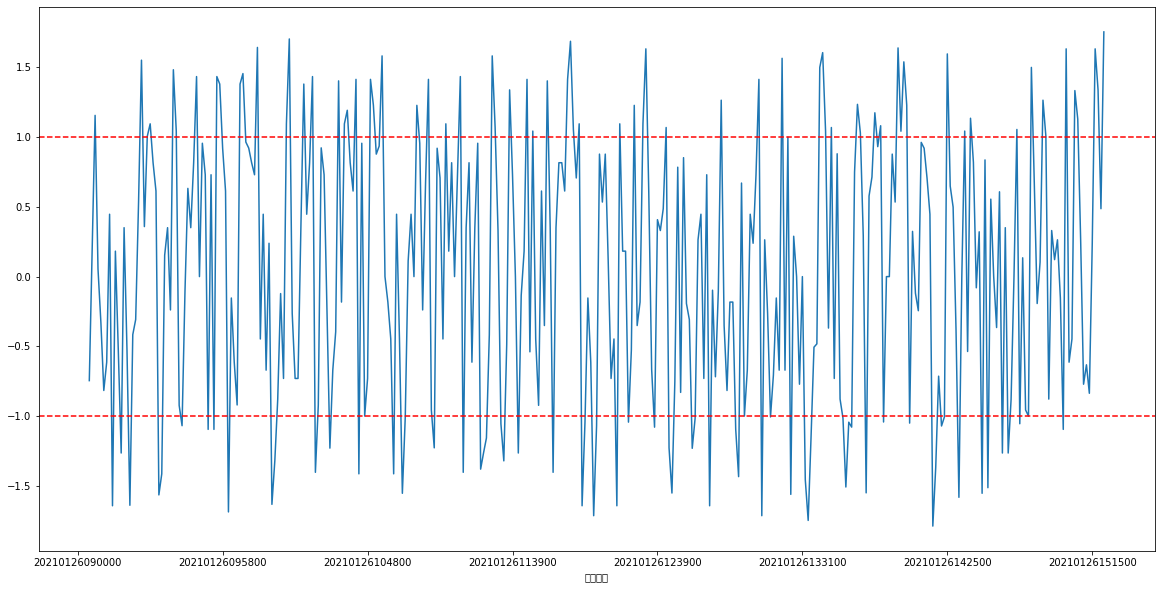

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

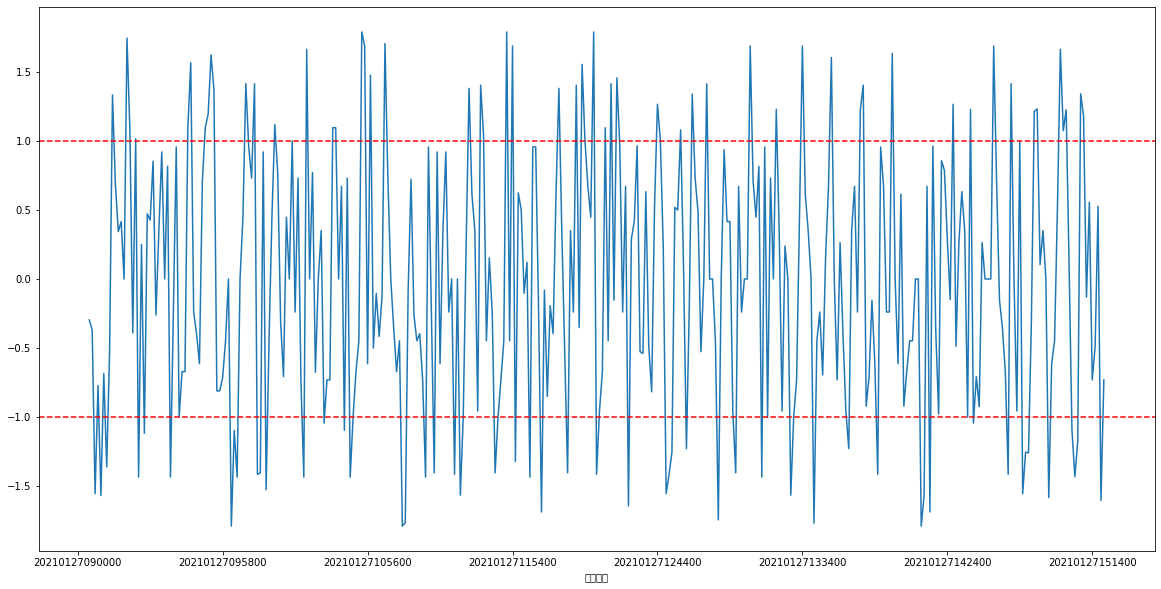

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

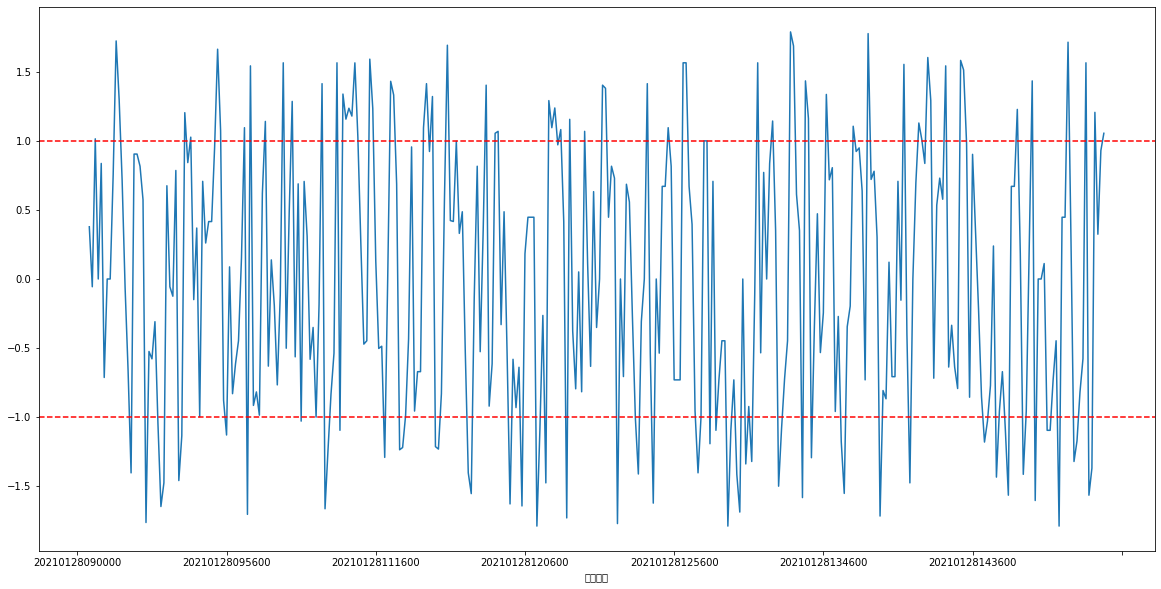

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

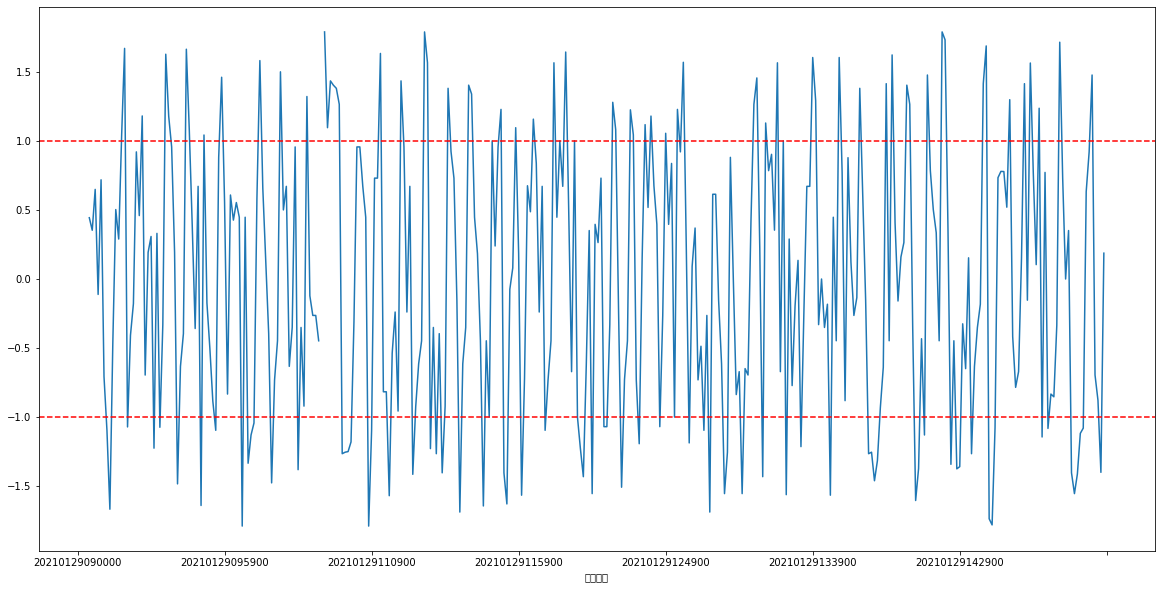

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

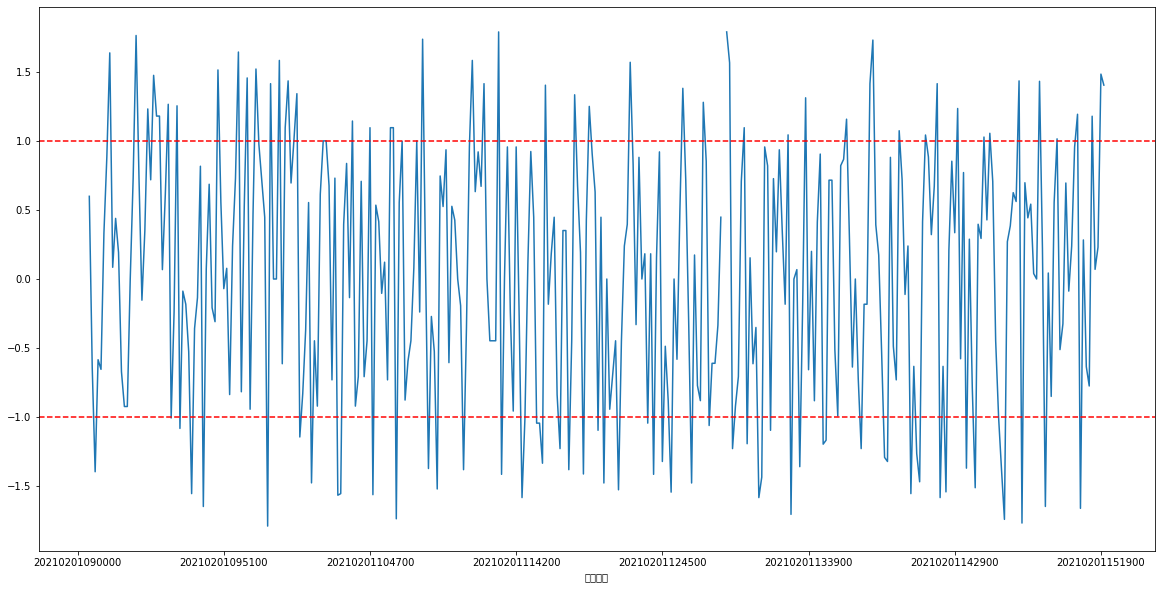

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

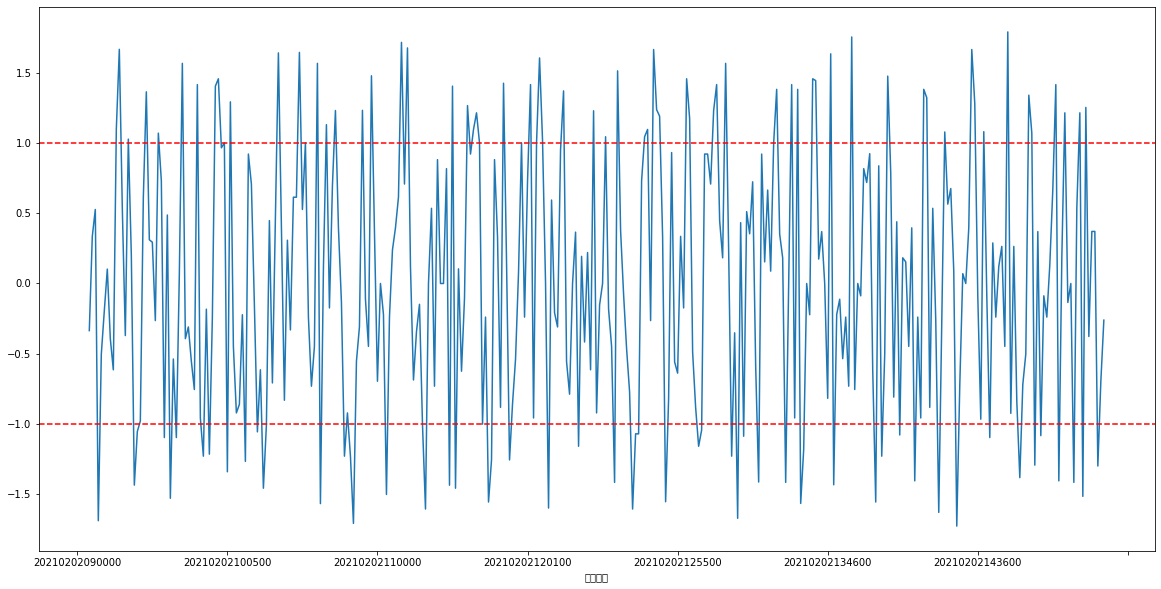

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

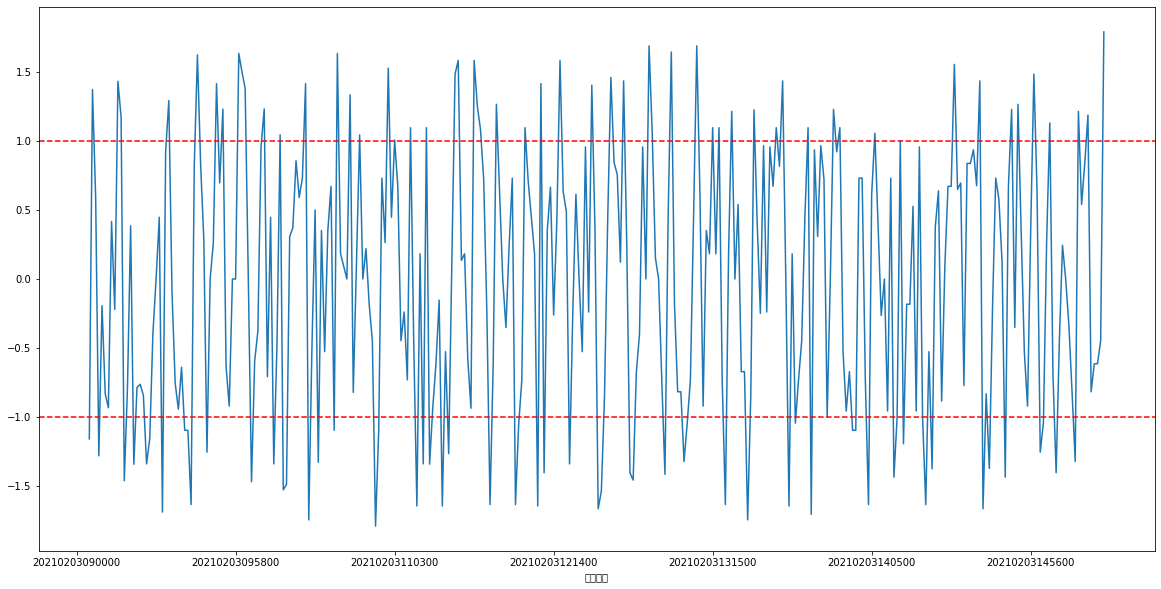

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

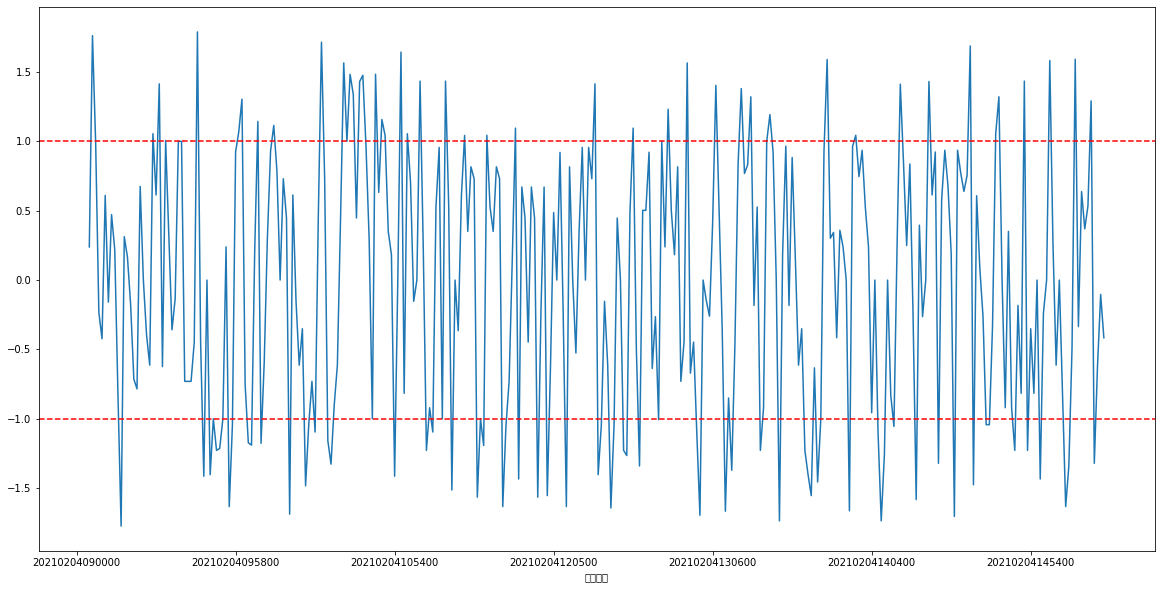

In [ ]:
for date in calender[-10:]:
    plt.rcParams["figure.figsize"] = (20, 10)
    # df[date]['spread'].plot()
    df[date]['ma60_zscore'].plot()
    # temp_high = df[date]['ma60_spread'] +10
    # temp_low = df[date]['ma60_spread']-10
    # temp_high.plot(linestyle='--')
    # temp_low.plot(linestyle='--')
    # df[date]['kodex200'].plot()
    # df[date]['tiger_top10'].plot()
    plt.axhline((1), color='red', linestyle='--')
    plt.axhline((-1), color='red', linestyle='--')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (30, 15)
# temp['kodex200_cumret'].plot()
# temp['kodex_active_cumret'].plot()
# temp['tiger_active_cumret'].plot()
temp['kodex200'].plot()
temp['tiger_top10'].plot()
# temp['ma30'].plot()

# 4. 스프레드 확인

In [2]:
cd drive/My Drive/algorithmtrading/pair_trading/bidask

/content/drive/My Drive/algorithmtrading/pair_trading/bidask


In [4]:
now = '20210205'

kodex_TR_bidask = pd.read_pickle('KODEX 200TR_'+now)
tiger_top10_bidask = pd.read_pickle('TIGER TOP10'+now)

# kodex_TR_bidask = kodex_TR_bidask.reset_index()[['bid','ask']]
# tiger_top10_bidask = tiger_top10_bidask.reset_index()[['bid','ask']]
# bidask = pd.concat([kodex_TR_bidask,tiger_top10_bidask],axis=1)
bidask =  pd.merge(left = kodex_TR_bidask , right = tiger_top10_bidask, how = "inner", on = "time")
# bidask =  bidask[::-1]
bidask.columns = ['kodex_TR_bid','kodex_TR_ask','tiger_top10_bid','tiger_top10_ask']
bidask['kodex_TR_ask'] = bidask['kodex_TR_ask'] 
bidask['kodex_TR_bid'] = bidask['kodex_TR_bid'] 
kodex_TR_ask = bidask['kodex_TR_ask']
kodex_TR_bid = bidask['kodex_TR_bid']
tiger_top10_ask = bidask['tiger_top10_ask']
tiger_top10_bid = bidask['tiger_top10_bid']
bidask

,kodex_TR_bid,kodex_TR_ask,tiger_top10_bid,tiger_top10_ask
time,,,,
093034,13800,13780,15290,15275
093038,13800,13780,15290,15275
093041,13800,13780,15290,15275
093044,13800,13785,15280,15275
093047,13805,13785,15285,15280
...,...,...,...,...
151949,13830,13815,15330,15325
151952,13830,13815,15330,15325
151955,13830,13815,15330,15325


## - bidask 스프레드

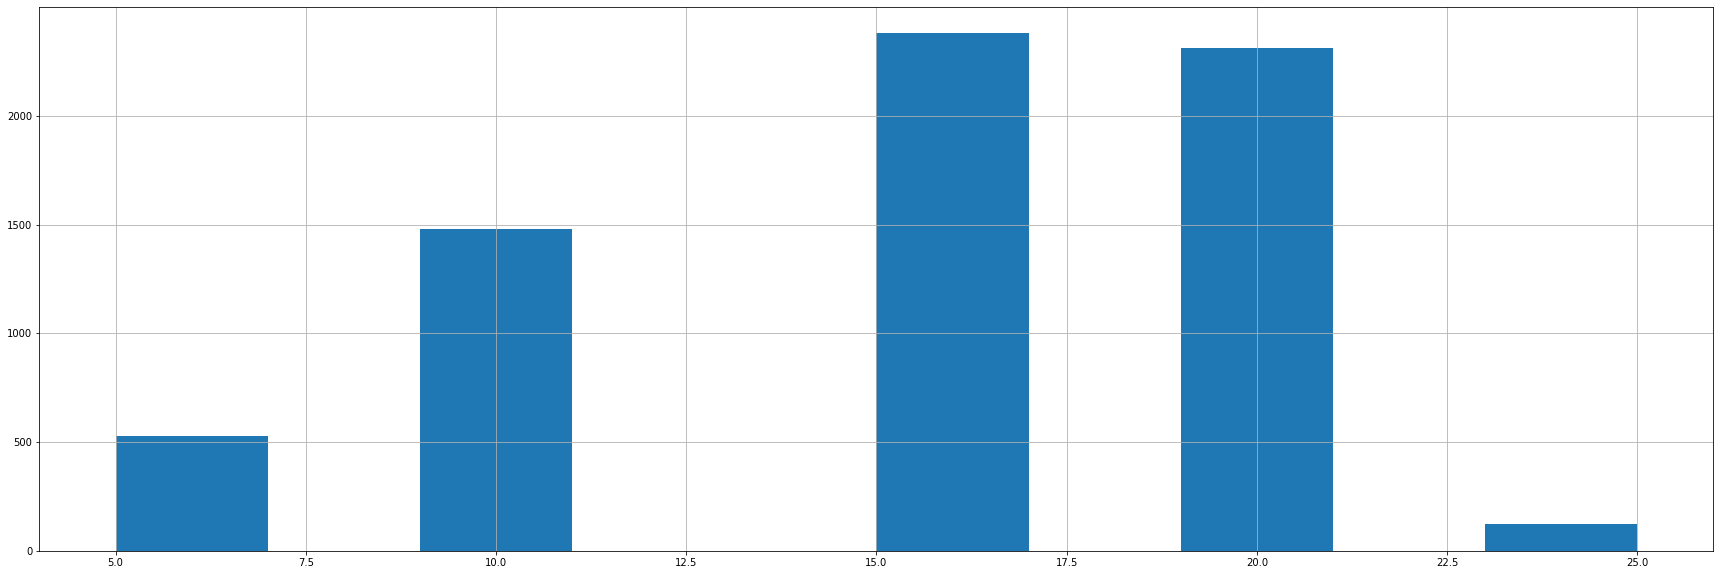

In [5]:
plt.rcParams["figure.figsize"] = (30, 10)
bidask_spread = kodex_TR_bid-kodex_TR_ask
bidask_spread.hist()

# tiger_top10_ask_kodex_TR_bid spread freaquency    (청산포지션)

-1525    1056
-1530    1026
-1535     908
-1520     896
-1515     662
-1510     640
-1540     513
-1505     343
-1545     288
-1500     152
-1550     113
-1555      86
-1495      76
-1490      29
-1560      21
-1485      12
-1480       3
dtype: int64


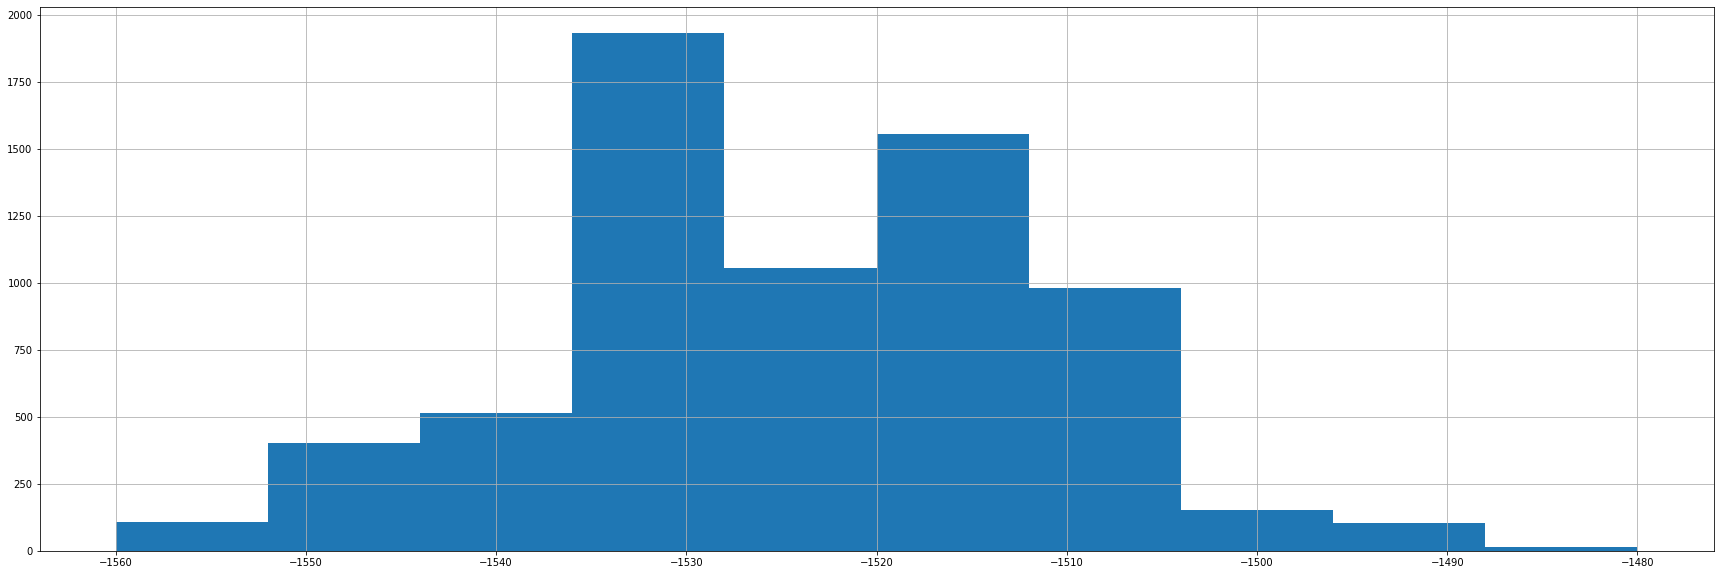

In [6]:
long = kodex_TR_ask - tiger_top10_bid
long.hist()
finish = long.value_counts() 
print(finish[:30])

# kodex_TR_ask_tiger_top10_bid spread freaquency (포지션시작)

1500    854
1495    817
1505    781
1510    745
1490    700
1485    594
1515    549
1480    466
1520    338
1475    326
1470    217
1525    144
1530    127
1465     79
1460     45
1535     19
1455     18
1445      2
1450      2
1540      1
dtype: int64


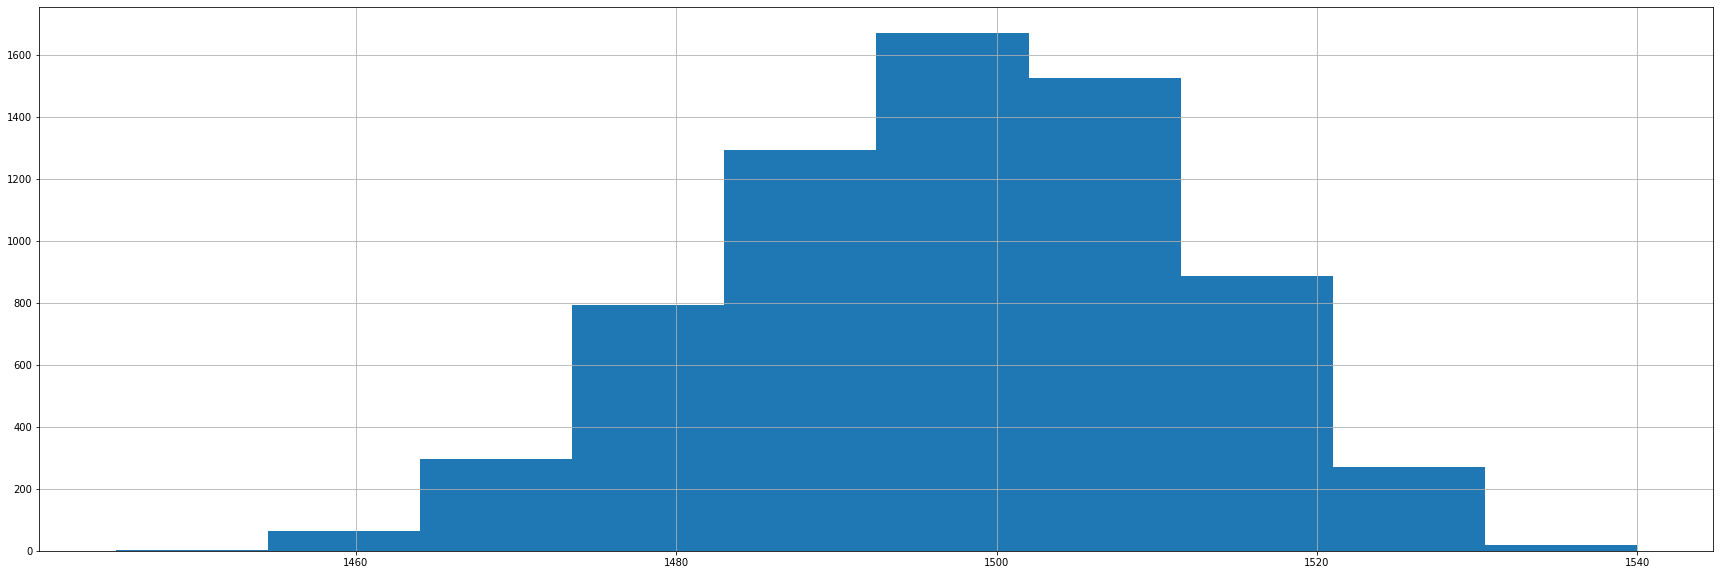

In [7]:
short = tiger_top10_ask - kodex_TR_bid
short.hist()
start = short.value_counts() 
print(start[:30])

In [ ]:
kodex_TR_bidask.plot()

# 시뮬레이션

In [8]:
profit = 0
profits = {}

tiger_top10 = 50
kodex_TR = 50

init = 50

lev = 1

spread_start = list(map(int,start.index))
spread_finish = list(map(int,finish.index))


for j in spread_start[:30]:
    for k in spread_finish[:30]:
        if j + k <= 0:
            continue
        profit = 0
        t = 0
        check = None
        tiger_top10 = 50
        kodex_TR = 50
        for i in range(len(bidask)):
            if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex_TR_bid'].iloc[i] >= j and init <=kodex_TR<= init*2-lev:
                tiger_top10 -= lev
                kodex_TR += lev
                profit += bidask['tiger_top10_ask'].iloc[i]*lev - bidask['kodex_TR_bid'].iloc[i]*lev
                print('shortstart',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex_TR_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'short'
            if bidask['kodex_TR_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= k and kodex_TR > init and check == 'short':
                profit += bidask['kodex_TR_ask'].iloc[i]*(kodex_TR - init) - bidask['tiger_top10_bid'].iloc[i]*(kodex_TR-init)
                kodex_TR = init
                tiger_top10 = init
                print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_TR_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)       
                t += 2


            if bidask['kodex_TR_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= k and init<= tiger_top10<=init*2-lev:
                tiger_top10 += lev
                kodex_TR -= lev
                profit += bidask['kodex_TR_ask'].iloc[i]*lev - bidask['tiger_top10_bid'].iloc[i]*lev
                print('longstart',i,'번째거래 / ','  ask:',bidask['kodex_TR_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'long'
            if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex_TR_bid'].iloc[i] >= j and tiger_top10 > init and check == 'long':
                profit += bidask['tiger_top10_ask'].iloc[i]*(tiger_top10 - init) - bidask['kodex_TR_bid'].iloc[i]*(tiger_top10-init)
                kodex_TR = init
                tiger_top10 = init
                print('longfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex_TR_bid'].iloc[i],'  profit:',profit)       
                t += 2
        
        if check == 'short':
            profit += bidask['kodex_TR_ask'].iloc[-1]*(kodex_TR - init) - bidask['tiger_top10_bid'].iloc[-1]*(kodex_TR-init)
            print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_TR_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit) 
        if check == 'long':
            profit += bidask['tiger_top10_ask'].iloc[i]*(tiger_top10 - init) - bidask['kodex_TR_bid'].iloc[i]*(tiger_top10-init)
            print('longfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex_TR_bid'].iloc[i],'  profit:',profit)     

        profits[(j,k,t)] = profit - t*6
        print('-------------------------------------------------------------------------------------------------------------------')

profits = sorted(profits.items(), key=lambda x: x[1], reverse=True)
profits[:20]

Streaming output truncated to the last 5000 lines.
longstart 2541 번째거래 /    ask: 13770   bid: 15265   profit: -24885
longstart 2542 번째거래 /    ask: 13770   bid: 15265   profit: -26380
longstart 2543 번째거래 /    ask: 13770   bid: 15265   profit: -27875
longfinish 2692 번째거래 /    ask: 15275   bid: 13750   profit: 4150
shortstart 2693 번째거래 /    ask: 15275   bid: 13750   profit: 5675
shortstart 2905 번째거래 /    ask: 15240   bid: 13715   profit: 7200
shortstart 2943 번째거래 /    ask: 15255   bid: 13730   profit: 8725
shortstart 2989 번째거래 /    ask: 15255   bid: 13730   profit: 10250
shortstart 3003 번째거래 /    ask: 15260   bid: 13735   profit: 11775
shortstart 3038 번째거래 /    ask: 15285   bid: 13760   profit: 13300
shortstart 3039 번째거래 /    ask: 15285   bid: 13760   profit: 14825
shortstart 3040 번째거래 /    ask: 15285   bid: 13760   profit: 16350
shortstart 3041 번째거래 /    ask: 15285   bid: 13760   profit: 17875
shortstart 3042 번째거래 /    ask: 15285   bid: 13760   profit: 19400
shortstart 3043 번째거래 /    ask

[((1525, -1495, 450), 4920),
 ((1520, -1495, 514), 4631),
 ((1525, -1490, 352), 4273),
 ((1520, -1490, 406), 4119),
 ((1525, -1500, 666), 4079),
 ((1530, -1495, 366), 4014),
 ((1515, -1495, 524), 3846),
 ((1520, -1500, 800), 3710),
 ((1515, -1490, 416), 3389),
 ((1530, -1490, 268), 3252),
 ((1530, -1500, 482), 2998),
 ((1515, -1500, 904), 2881),
 ((1520, -1485, 244), 2851),
 ((1525, -1505, 726), 2834),
 ((1510, -1495, 576), 2769),
 ((1525, -1485, 190), 2650),
 ((1510, -1490, 468), 2637),
 ((1515, -1485, 254), 2561),
 ((1535, -1495, 230), 2500),
 ((1530, -1505, 484), 2266)]

# 이동평균 스프레드 시물레이션

In [ ]:
profit = 0
t = 0
check = None
tiger_top10 = 30
kodex_TR = 30
lev = 30
j = -85
k = 100
for i in range(len(bidask)):
    if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex_TR_bid'].iloc[i] >= j and init <=kodex_TR<= init*2-lev:
        tiger_top10 -= lev
        kodex_TR += lev
        profit += bidask['tiger_top10_ask'].iloc[i]*lev - bidask['kodex_TR_bid'].iloc[i]*lev
        print('shortstart',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex_TR_bid'].iloc[i],'  profit:',profit)
        t += 2
        check = 'short'
    if bidask['kodex_TR_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= k and kodex_TR > init and check == 'short':
        profit += bidask['kodex_TR_ask'].iloc[i]*(kodex_TR - init) - bidask['tiger_top10_bid'].iloc[i]*(kodex_TR-init)
        kodex_TR = init
        tiger_top10 = init
        print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_TR_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)       
        t += 2


    if bidask['kodex_TR_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= k and init<= tiger_top10<=init*2-lev:
        tiger_top10 += lev
        kodex_TR -= lev
        profit += bidask['kodex_TR_ask'].iloc[i]*lev - bidask['tiger_top10_bid'].iloc[i]*lev
        print('longstart',i,'번째거래 / ','  ask:',bidask['kodex_TR_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)
        t += 2
        check = 'long'
    if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex_TR_bid'].iloc[i] >= j and tiger_top10 > init and check == 'long':
        profit += bidask['tiger_top10_ask'].iloc[i]*(tiger_top10 - init) - bidask['kodex_TR_bid'].iloc[i]*(tiger_top10-init)
        kodex_TR = init
        tiger_top10 = init
        print('longfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex_TR_bid'].iloc[i],'  profit:',profit)       
        t += 2

if check == 'short':
    profit += bidask['kodex_TR_ask'].iloc[-1]*(kodex_TR - init) - bidask['tiger_top10_bid'].iloc[-1]*(kodex_TR-init)
    print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_TR_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit) 
if check == 'long':
    profit += bidask['tiger_top10_ask'].iloc[i]*(tiger_top10 - init) - bidask['kodex_TR_bid'].iloc[i]*(tiger_top10-init)
    print('longfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex_TR_bid'].iloc[i],'  profit:',profit)     

print(profit)
print('-------------------------------------------------------------------------------------------------------------------')

longstart 1 번째거래 /    ask: 14010   bid: 13900   profit: 3300
longfinish 3 번째거래 /    ask: 13885   bid: 13970   profit: 750
shortstart 4 번째거래 /    ask: 13880   bid: 13965   profit: -1800
shortfinish 18 번째거래 /    ask: 13915   bid: 13810   profit: 1350
longstart 18 번째거래 /    ask: 13915   bid: 13810   profit: 4500
longfinish 43 번째거래 /    ask: 13855   bid: 13930   profit: 2250
shortstart 44 번째거래 /    ask: 13890   bid: 13945   profit: 600
shortfinish 52 번째거래 /    ask: 13895   bid: 13795   profit: 3600
longstart 52 번째거래 /    ask: 13895   bid: 13795   profit: 6600
longfinish 54 번째거래 /    ask: 13795   bid: 13895   profit: 3600
3600
-------------------------------------------------------------------------------------------------------------------


In [ ]:
profit = 0
profits = {}

tiger_top10 = 30
kodex_TR = 30

init = 30

lev = 1

profit = 0
t = 0
check = None

dfj = []
dfk = []
tempk = 0
tempj = 0
for i in range(len(bidask)):
    short = int(bidask['kodex_TR_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i])
    long =int(bidask['tiger_top10_ask'].iloc[i] - bidask['kodex_TR_bid'].iloc[i])

    dfj.append(short)
    dfk.append(long)   

    if i <= 200:
        continue
    
    del dfj[0]
    del dfk[0]

    j = pd.Series(dfj)
    k = pd.Series(dfk)
    j = j.rolling(window=200).mean()
    k = k.rolling(window=200).mean()

    if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex_TR_bid'].iloc[i] >= k.iloc[-1]+50 and init <=kodex_TR<= init*2-lev:
        tiger_top10 -= lev
        kodex_TR += lev
        profit += bidask['tiger_top10_ask'].iloc[i]*lev - bidask['kodex_TR_bid'].iloc[i]*lev
        print('shortstart',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex_TR_bid'].iloc[i],'  profit:',profit)
        print(tiger_top10,kodex_TR)
        t += 2
        check = 'short'
        tempk = bidask['tiger_top10_ask'].iloc[i] - bidask['kodex_TR_bid'].iloc[i]
    if bidask['kodex_TR_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= -tempk+50 and kodex_TR > init and check == 'short':
        profit += bidask['kodex_TR_ask'].iloc[i]*(kodex_TR - init) - bidask['tiger_top10_bid'].iloc[i]*(kodex_TR-init)
        kodex_TR = init
        tiger_top10 = init
        print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_TR_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)       
        t += 2


    if bidask['kodex_TR_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= j.iloc[-1]+50 and init<= tiger_top10<=init*2-lev:
        tiger_top10 += lev
        kodex_TR -= lev
        profit += bidask['kodex_TR_ask'].iloc[i]*lev - bidask['tiger_top10_bid'].iloc[i]*lev
        print('longstart',i,'번째거래 / ','  ask:',bidask['kodex_TR_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)
        print(tiger_top10,kodex_TR,j.iloc[-1])
        t += 2
        check = 'long'
        tempj = bidask['kodex_TR_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i]
        continue
    if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex_TR_bid'].iloc[i] >= -tempj+50 and tiger_top10 > init and check == 'long':
        profit += bidask['tiger_top10_ask'].iloc[i]*(tiger_top10 - init) - bidask['kodex_TR_bid'].iloc[i]*(tiger_top10-init)
        kodex_TR = init
        tiger_top10 = init
        print('longfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex_TR_bid'].iloc[i],'  profit:',profit)       
        t += 2

if check == 'short':
    profit += bidask['kodex_TR_ask'].iloc[-1]*(kodex_TR - init) - bidask['tiger_top10_bid'].iloc[-1]*(kodex_TR-init)
    print('shortfinish',i,'번째거래 / ','  ask:',bidask['kodex_TR_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit) 
    print(tiger_top10,kodex_TR)
if check == 'long':
    profit += bidask['tiger_top10_ask'].iloc[i]*(tiger_top10 - init) - bidask['kodex_TR_bid'].iloc[i]*(tiger_top10-init)
    print('longfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex_TR_bid'].iloc[i],'  profit:',profit)    
    print(tiger_top10,kodex_TR)
print(profit)

0


In [ ]:
-22300+

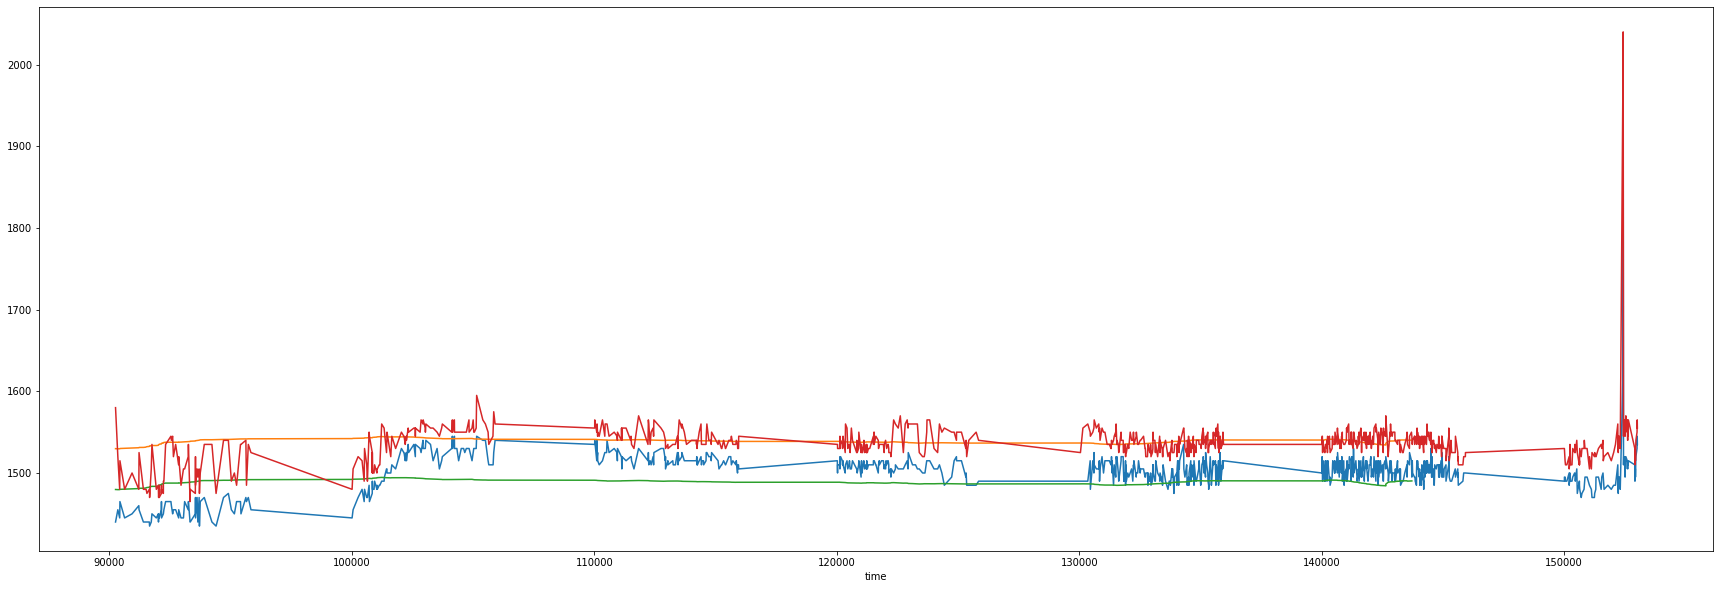

In [ ]:
short.plot()
(-long.rolling(window = 200).mean()).plot()
(-long.rolling(window = 200).mean()-50).plot()
(-long).plot()

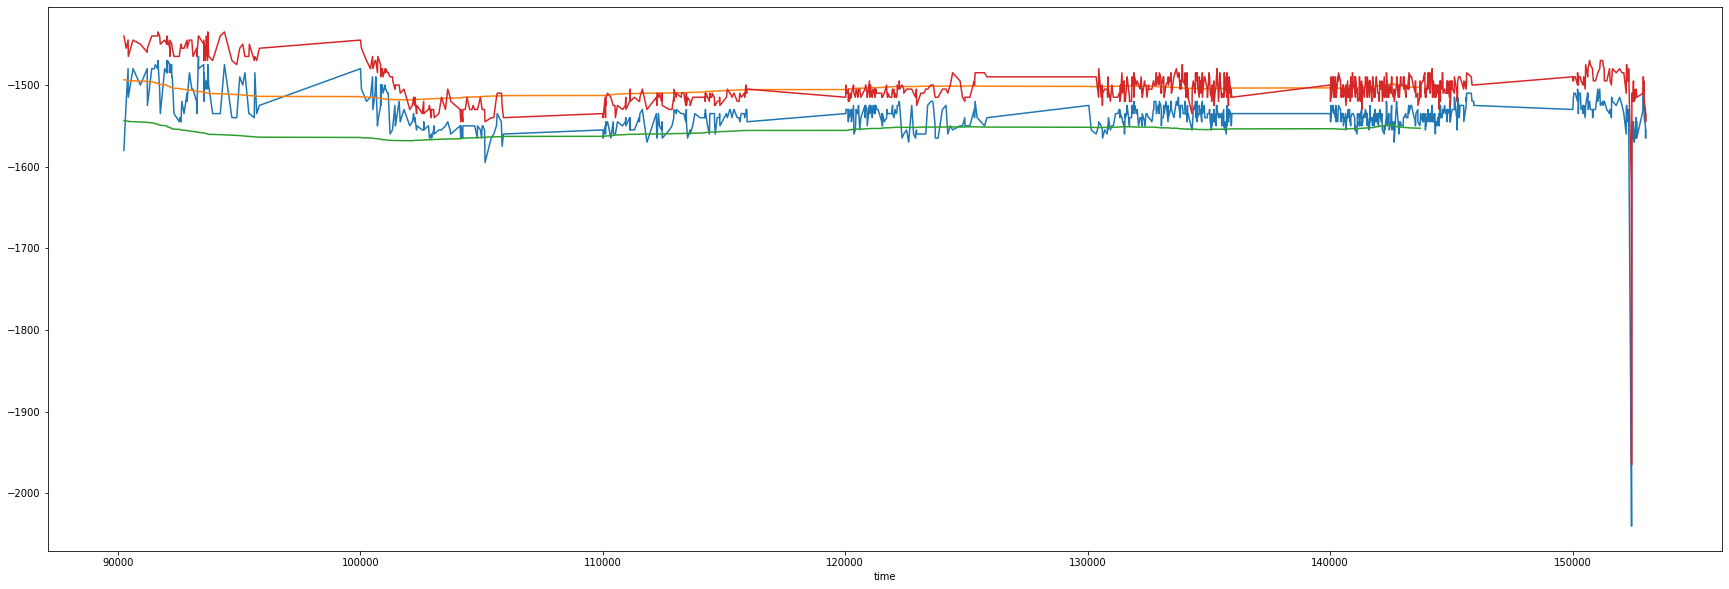

In [ ]:
long.plot()
(-short.rolling(window = 200).mean()).plot()
(-short.rolling(window = 200).mean()-50).plot()
(-short).plot()